### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
df_cars=pd.read_csv('vehicle.csv').dropna()

In [3]:
df_cars.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
df_cars.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

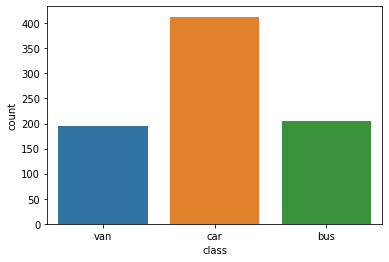

In [5]:
sns.countplot(x='class',data=df_cars)

In [6]:
df_cars['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [7]:
df_cars.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [8]:
df_cars.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [9]:
df_cars.drop(['class'],axis=1,inplace=True)

In [10]:
df_cars_z=df_cars.apply(zscore)

In [11]:
df_cars_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [12]:
cluster_error=[]

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [13]:
from sklearn.cluster import KMeans

In [14]:
cluster_range=range(1,10)
cluster_errors=[]
for num_clusters in cluster_range:
 clusters = KMeans( num_clusters)
 clusters.fit(df_cars_z)
 labels = clusters.labels_
 centroids = clusters.cluster_centers_
 cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]
    

num_clusters  cluster_errors
0             1    14634.000000
1             2     8623.136976
2             3     7037.467395
3             4     5739.201327
4             5     5189.455243
5             6     4707.273287
6             7     4349.665218
7             8     4084.276910
8             9     3867.296406

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

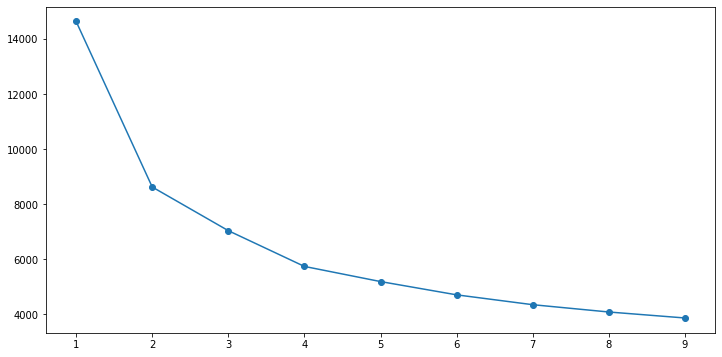

In [15]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

from the plot we can observed that there are 3 or 4 good cluster now we can take cluster=3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [16]:
cluster = KMeans( n_clusters = 3, random_state = 2000 )
cluster.fit(df_cars_z)
mpg_df_attr_z_copy = df_cars_z.copy(deep = True)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [17]:
centroids = cluster.cluster_centers_
centroids

array([[-0.89640009, -0.48207061, -0.85196226, -1.02675826, -0.46581606,
        -0.20340912, -0.75933016,  0.83667858, -0.72743741, -0.43998661,
        -0.76300107, -0.76675888, -0.35618264,  0.79769971, -0.08839932,
        -0.30124859, -1.02685623, -1.06510664],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.22403254, -0.60827051, -0.31718356, -0.01731624,  0.20645992,
        -0.12529856, -0.46186223,  0.32626501, -0.49194739, -0.57592328,
        -0.41419948, -0.46385031, -0.63522265, -0.64777111, -0.06610151,
         0.02381036,  0.87062354,  0.73894602]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [18]:
centroid_df = pd.DataFrame(centroids, columns = list(df_cars_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.896400    -0.482071             -0.851962     -1.026758   
1     1.130765     1.170942              1.195006      1.019095   
2    -0.224033    -0.608271             -0.317184     -0.017316   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.465816                -0.203409      -0.759330   
1              0.215052                 0.342508       1.271805   
2              0.206460                -0.125299      -0.461862   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.836679               -0.727437                  -0.439987   
1      -1.190612                1.275484                   1.092668   
2       0.326265               -0.491947                  -0.575923   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.763001          -0.766759                  -0.356183   
1         1.220381           1.281327                   1.079542   
2        -0.414199          -0.463850                  -0.635223   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.797700       -0.088399         -0.301249   
1                    -0.028795        0.162290          0.265665   
2                    -0.647771       -0.066102          0.023810   

   skewness_about.2  hollows_ratio  
0         -1.026856      -1.065107  
1         -0.005356       0.183801  
2          0.870624       0.738946

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [19]:
prediction=cluster.predict(df_cars_z)
df_cars_z["GROUP"] = prediction  

In [20]:
prediction

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [21]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])


a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [22]:
df=np.concatenate((a,b,c))
com_df=pd.DataFrame(df,columns=('X1','X2'))
com_df

X1         X2
0    13.882785   4.438501
1    11.687256   1.250981
2    10.316397   1.449346
3     9.837412  -2.041974
4     8.691601  -4.289773
5     9.824164   1.444590
6     9.216889   0.960682
7    10.199509  -2.480899
8    12.813390  -1.256776
9    13.841511   4.209154
10   12.565569  -0.820998
11    6.550742  -2.178250
12   10.360369  -0.563363
13   10.430790   0.155401
14   11.008313   1.417300
15   11.154466   0.900240
16    8.448394  -0.296867
17    9.570574  -2.117886
18   12.364814  -1.756535
19   12.890359  -1.184771
20    9.136206  -1.975383
21    8.716328  -2.078101
22   10.953541   2.002577
23   10.817454  -0.584992
24   11.633308   4.434253
25    8.691852  -1.099665
26    9.536658   0.657788
27   11.976719   0.189915
28   11.399653  -3.204028
29    9.520514  -2.567973
..         ...        ...
220   9.895906  22.842078
221  10.073600  22.814663
222   8.529815  17.647249
223  11.615464  18.819418
224  10.184611  19.344634
225   7.215987  19.145415
226  10.359450  18.851517
227  11.561999  25.652581
228  11.686179  23.571989
229   9.664926  23.822851
230  10.509933  20.353373
231   9.126237  19.396868
232  10.170006  19.892495
233   6.180599  17.538536
234   5.338764  20.630710
235   9.413344  16.861252
236   9.120308  21.323430
237  11.052484  21.727354
238   9.754318  17.763962
239  11.044858  22.737906
240  11.218778  21.112376
241   8.712640  21.618600
242   6.971657  18.398128
243  10.263979  20.628302
244  11.487017  18.604310
245   9.248848  24.346291
246   6.958291  16.448655
247  11.260042  20.333577
248   6.889835  21.238297
249  11.221498  24.025093

[250 rows x 2 columns]

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A43A9052B0>,
      dtype=object)

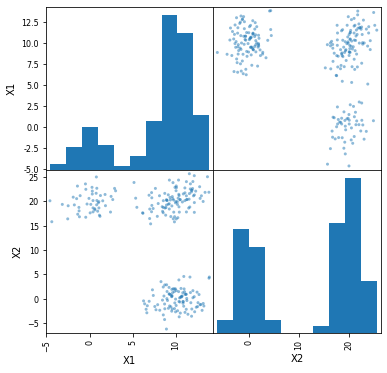

In [23]:
 pd.plotting.scatter_matrix(com_df, figsize=(6, 6),diagonal='hist')

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [24]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [33]:
link_df=linkage(com_df,method='ward')

In [34]:
pd.DataFrame(link_df).head()

0      1         2    3
0    6.0   35.0  0.040311  2.0
1  159.0  247.0  0.041534  2.0
2  190.0  214.0  0.042343  2.0
3   15.0   55.0  0.050397  2.0
4   23.0   97.0  0.059862  2.0

### 12. Plot the dendrogram for the consolidated dataframe

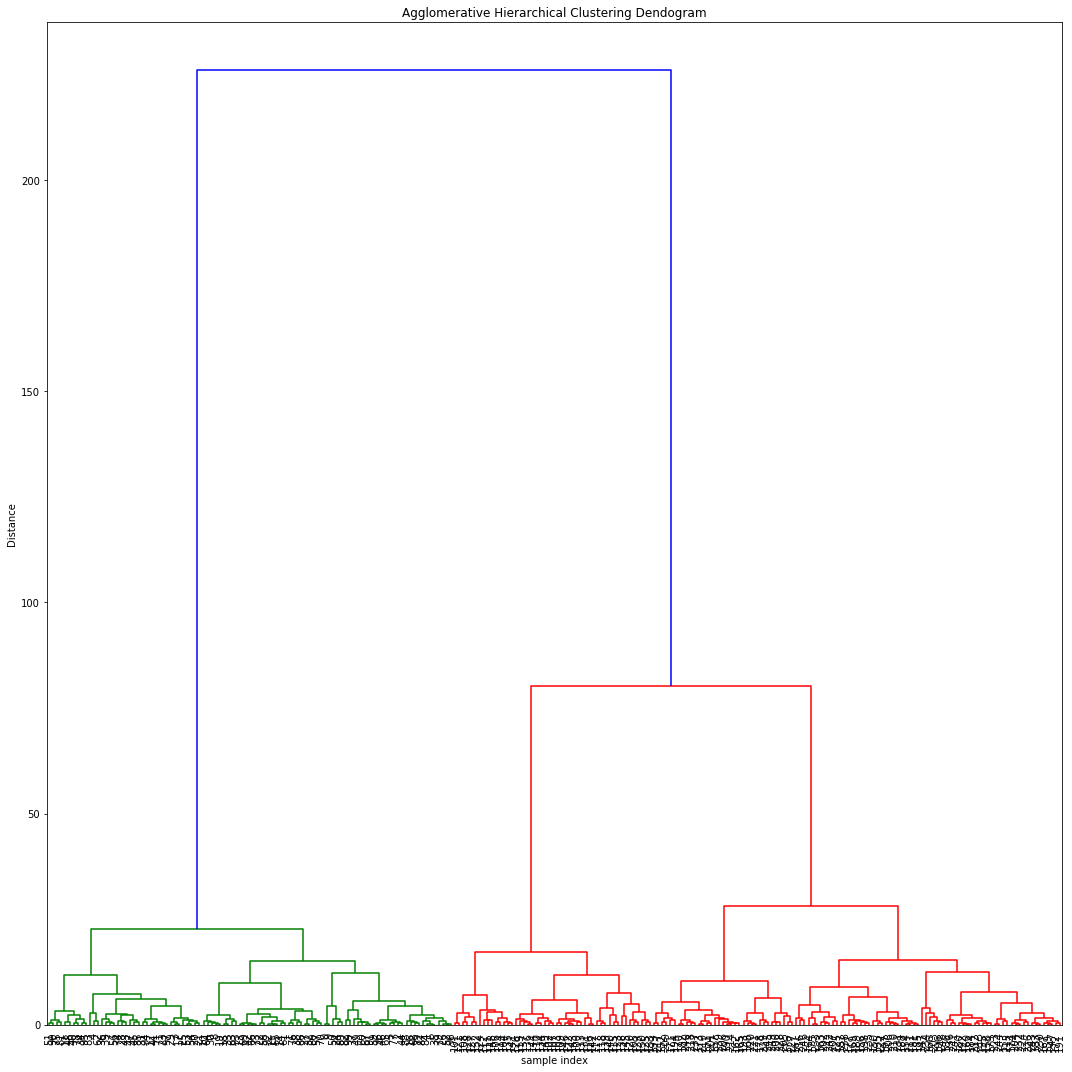

In [35]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(link_df, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

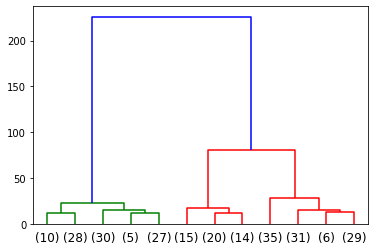

In [36]:
dendrogram(link_df,truncate_mode='lastp', p=12 )
plt.show()